# Create NetCDF from USGS GLCC geotiff

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,Workers: 16
Total threads: 256,Total memory: 235.37 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46141,Workers: 16
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,Total threads: 256
Started: Just now,Total memory: 235.37 GiB
Comm: tcp://127.0.0.1:36983,Total threads: 16
Dashboard: /user/g300046/levante-spawner-preset//proxy/45585/status,Memory: 14.71 GiB
Nanny: tcp://127.0.0.1:42563,


In [3]:
from pybodlib import glcc

In [4]:
ds = glcc.create_dataset(coords=True, bounds=True)#.compute()
ds

reading: /work/ch0636/g300046/glcc/glccgbg20_tif/gbogeg20.tif
creating dataset
creating coordinates from crs: +proj=igh +lon_0=0 +x_0=0 +y_0=0 +ellps=sphere +units=m +no_defs=True
creating bounds from crs: +proj=igh +lon_0=0 +x_0=0 +y_0=0 +ellps=sphere +units=m +no_defs=True


<xarray.Dataset>
Dimensions:         (y: 17347, x: 40031, index: 98, bounds: 2, vertices: 4)
Coordinates:
  * x               (x) float64 -2.002e+07 -2.001e+07 ... 2.001e+07 2.002e+07
  * y               (y) float64 -8.673e+06 -8.672e+06 ... 8.672e+06 8.673e+06
  * index           (index) int64 0 1 2 3 4 5 6 7 8 ... 90 91 92 93 94 95 96 100
    classification  (index) <U55 dask.array<chunksize=(98,), meta=np.ndarray>
    lon             (y, x) float64 dask.array<chunksize=(1738, 4010), meta=np.ndarray>
    lat             (y, x) float64 dask.array<chunksize=(1738, 4010), meta=np.ndarray>
    x_bounds        (x, bounds) float64 -2.002e+07 -2.001e+07 ... 2.002e+07
    y_bounds        (y, bounds) float64 -8.674e+06 -8.672e+06 ... 8.674e+06
    lon_bounds      (y, x, vertices) float64 dask.array<chunksize=(1738, 4010, 1), meta=np.ndarray>
    lat_bounds      (y, x, vertices) float64 dask.array<chunksize=(1738, 4010, 1), meta=np.ndarray>
Dimensions without coordinates: bounds, vertices
Data variables:
    glcc            (y, x) uint8 dask.array<chunksize=(1738, 4010), meta=np.ndarray>
Attributes:
    description:  Global Land Cover Characteristics Data Base Version 2.0.
    proj4:        +proj=igh +lon_0=0 +x_0=0 +y_0=0 +ellps=sphere +units=m +no...

<module 'matplotlib.pyplot' from '/work/ch0636/g300046/conda_envs/pangeo/lib/python3.9/site-packages/matplotlib/pyplot.py'>

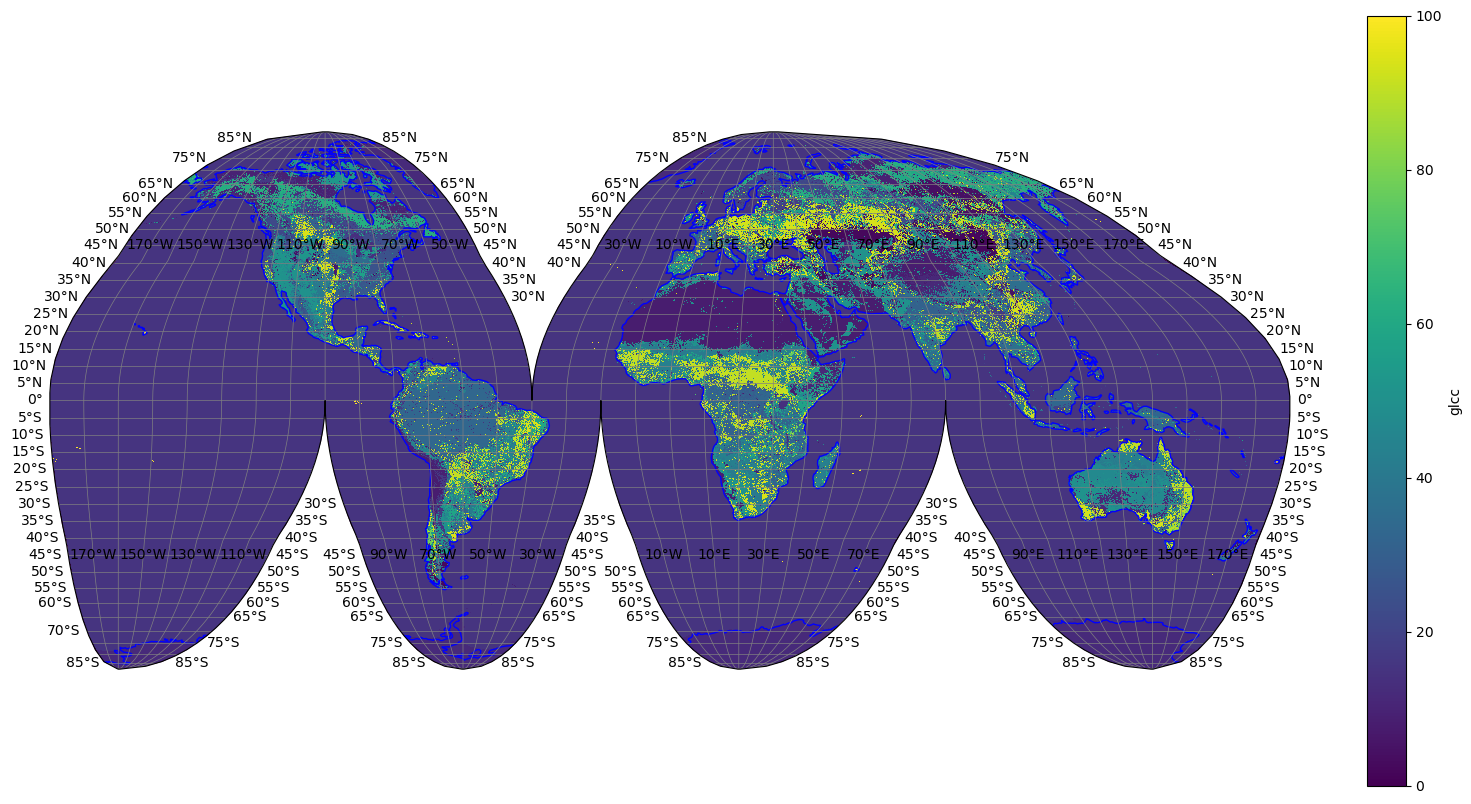

In [5]:
glcc.plot(ds.glcc[0::10, 0::10])

In [6]:
ds.nbytes / 1.e9

56.249237733

In [7]:
%time ds_ = ds.compute()

CPU times: user 31.9 s, sys: 59.4 s, total: 1min 31s
Wall time: 1min 32s


In [8]:
comp = dict(_FillValue=1.e20)
masked = ['lon', 'lat', 'lon_bounds', 'lat_bounds']
encoding = {var: comp for var in masked}

In [9]:
ds_.to_netcdf("/work/ch0636/g300046/glcc/glccgbg20_tif/gbogeg20.nc", encoding=encoding)